# Large Multimodal Models (LMMs)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install google-generativeai
!pip install python-dotenv

## Setup
### Load environment variables and API keys

In [22]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')
print(GOOGLE_API_KEY)

None


In [40]:
import os

with open('/content/drive/My Drive/Colab Notebooks/test/google_api_key', 'r') as f:
  api_key = f.read().strip()
#print(api_key)
os.environ['GOOGLE_API_KEY'] = api_key

In [41]:
# Set the genai library
import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
        api_key=GOOGLE_API_KEY,
        transport="rest",
        client_options=ClientOptions(
            api_endpoint=os.getenv("GOOGLE_API_BASE"),
        ),
)

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Helper functions

In [42]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


* Function to call LMM (Large Multimodal Model).

In [43]:
def call_LMM(image_path: str, prompt: str) -> str:
    # Load the image
    img = PIL.Image.open(image_path)

    # Call generative model
    model = genai.GenerativeModel('gemini-1.5-flash')
    # Disable streaming to get a more detailed error message
    response = model.generate_content([prompt, img], stream=False)
    #response.resolve() # This line is not needed when stream=False

    return to_markdown(response.text)

## Analyze images with an LMM

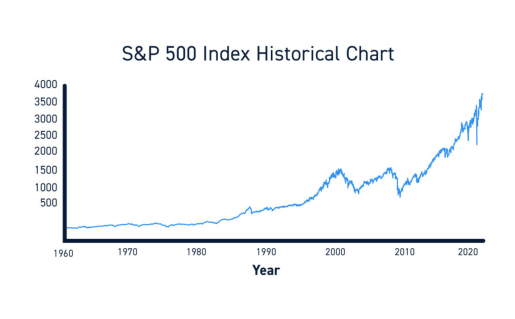

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picture = '/content/drive/My Drive/Colab Notebooks/test/SP-500-Index-Historical-Chart.jpg'
img = mpimg.imread(picture)  # Replace with the path to your image
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [57]:
# Use the LMM function
call_LMM(picture, "Explain what you see in this image.")

> The image is a line graph showing the historical performance of the S&P 500 index from 1960 to 2020.  The x-axis represents the year, and the y-axis represents the value of the index.  The line shows a general upward trend, indicating growth in the index over this period, with some fluctuations and periods of decline along the way.  The graph illustrates the long-term growth potential of the S&P 500, though it also highlights the inherent volatility of the stock market.


## Analyze a harder image

* Try something harder: Here's a figure we explained previously!

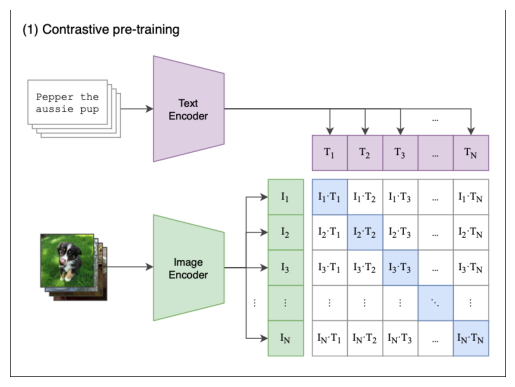

In [59]:
picture = '/content/drive/My Drive/Colab Notebooks/test/clip.png'
img = mpimg.imread(picture)  # Replace with the path to your image
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [60]:
call_LMM(picture, "Explain what you see in this image.")

> This image depicts a contrastive pre-training process for a multimodal model, likely used for tasks like image captioning or visual question answering.
> 
> Here's a breakdown:
> 
> 1. **Input Data:**  The process starts with two input modalities:
>     * **Text:** A set of text descriptions (e.g., "Pepper the aussie pup").
>     * **Images:** A set of corresponding images (multiple images of an Aussie puppy).
> 
> 2. **Encoders:**  Each modality is processed by a separate encoder:
>     * **Text Encoder:** Processes the text descriptions and generates text embeddings (T1, T2, T3...TN).
>     * **Image Encoder:** Processes the images and generates image embeddings (I1, I2, I3...IN).
> 
> 3. **Contrastive Learning:** The core of the process is contrastive learning.  The image and text embeddings are combined to form pairs.  The resulting matrix shows all possible pairs: Each row represents an image embedding (I), and each column represents a text embedding (T).  A positive pair is formed when an image embedding and its corresponding text embedding are close together in embedding space, indicated by the light blue shading in the matrix.  The goal of the training is to learn representations where positive pairs have a high similarity score and negative pairs (all other combinations) have a low similarity score.  This pushes the model to learn meaningful relationships between images and their text descriptions.
> 
> 4. **Output:** The trained encoders are then used in downstream tasks (not shown in the image), where the learned representations allow the model to understand the relationship between images and their textual descriptions.
> 
> In summary, the image illustrates the architecture and workflow of a contrastive pre-training technique for multimodal learning. The goal is to learn robust image and text representations that capture semantic relationships between the two modalities.
